In [58]:
import xgboost as xgb
import random

In [2]:
import os
os.chdir('C:/Users/xufan/Downloads/231final')

In [ ]:
#xgboost begins here

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.svm import SVC

def load_data():
    # load data 
    data = pd.read_csv(
        'http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', header=None)
    p_ = data.shape[1]
    p = p_ - 1
    X = data.iloc[:, :p]
    y = data.iloc[:, p]
    return X.values, y.values

In [160]:
X, y = load_data()


In [161]:
indices = np.random.permutation(X.shape[0])
training_idx, test_idx = indices[:3655], indices[3655:]
train_x, train_y = X[training_idx,:], y[training_idx]
test_x,test_y=X[test_idx,:],y[test_idx]

In [62]:
xgbc = xgb.XGBClassifier()
xgbc.fit(train_x,train_y)

[01:24:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\xufan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
ypred = xgbc.predict(test_x)
train_pred=xgbc.predict(train_x)
accuracy_test=sum(ypred==test_y)/len(test_y)
accuracy_train=sum(train_pred==train_y)/len(train_y)
print('train accuracy is: '+str(accuracy_train))
print('test accuracy is: '+str(accuracy_test))

train accuracy is: 0.9975376196990424
test accuracy is: 0.9482029598308668


In [86]:
xgbc1=xgb.XGBClassifier(n_estimators=150,max_depth=40)
xgbc1.fit(train_x,train_y)
ypred1 = xgbc1.predict(test_x)
train_pred1=xgbc1.predict(train_x)
accuracy_test=sum(ypred1==test_y)/len(test_y)
accuracy_train=sum(train_pred1==train_y)/len(train_y)
print('train accuracy is: '+str(accuracy_train))
print('test accuracy is: '+str(accuracy_test))

[01:59:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuracy is: 0.999452804377565
test accuracy is: 0.9630021141649049


In [9]:
#svm package

In [236]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto',C=5,max_iter=3000,kernel='rbf'))
clf.fit(train_x, train_y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, gamma='auto', max_iter=3000))])

In [237]:
ypred = clf.predict(test_x)
train_pred=clf.predict(train_x)
accuracy_test=sum(ypred==test_y)/len(test_y)
accuracy_train=sum(train_pred==train_y)/len(train_y)
print('train accuracy is: '+str(accuracy_train))
print('test accuracy is: '+str(accuracy_test))

train accuracy is: 0.960875512995896
test accuracy is: 0.9207188160676533


In [ ]:
#linear SVM begins here

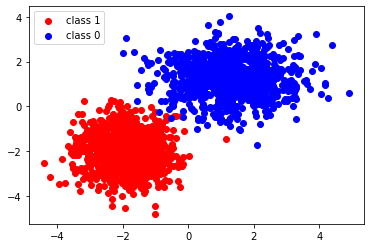

In [142]:
#linear svm toy data
import numpy as np
from matplotlib import pyplot as plt

# Generate data
def load_data():
	# generate random 2-D data
	X_pos = np.random.randn(1000, 2) * np.array([[0.7, 0.8]]) + np.array([[-2.0, -2.0]])
	X_neg = np.random.randn(1000, 2) * np.array([[1.0, 0.8]]) + np.array([[1.25, 1.25]])
	X = np.concatenate([X_pos, X_neg], axis=0)
	y = np.concatenate([np.ones(1000), -np.ones(1000)])
	return X, y

# here is the visualization of data
X, y = load_data()
plt.figure()
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], c='red', label='class 1')
plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1], c='blue', label='class 0')
plt.legend()


In [143]:
indices = np.random.permutation(X.shape[0])
training_idx, test_idx = indices[:800], indices[200:]
train_x, train_y = X[training_idx,:], y[training_idx]
test_x,test_y=X[test_idx,:],y[test_idx]

In [112]:
import numpy as np 
testaccu_list=[]
trainaccu_list=[]
class mySVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
        

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = (y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1)
                if condition:
                    self.w -= self.lr * (  2*self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (  2*self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]
                test_result=self.predict(test_x)
                train_result=self.predict(train_x)
    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [113]:
test=mySVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
test.fit(X=train_x,y=train_y)

In [128]:

ypred = test.predict(test_x)
train_pred=test.predict(train_x)
accuracy_test=sum(ypred==test_y)/len(test_y)
accuracy_train=sum(train_pred==train_y)/len(train_y)
print('train accuracy is: '+str(accuracy_train))
print('test accuracy is: '+str(accuracy_test))

train accuracy is: 0.99875
test accuracy is: 0.9955555555555555


In [144]:
import numpy as np 
lr = 0.001
lambda_param = 0.01
n_iters = 1000
w = None
b = None
testaccu_list=[]
trainaccu_list=[]


n_samples, n_features = train_x.shape
        
y_ = np.where(train_y <= 0, -1, 1)
        
w = np.zeros(n_features)
b = 0

for i in range(n_iters):
    for idx, x_i in enumerate(train_x):
        condition = (y_[idx] * (np.dot(x_i, w) - b) >= 1)
        
        if condition:
            w -= lr * (  2*lambda_param * w)
        else:
            w -= lr * (  2*lambda_param * w - np.dot(x_i, y_[idx]))
            b -= lr * y_[idx]
    test_acc=sum((np.sign(np.dot(test_x, w) - b))==test_y)/len(test_y)
    train_acc=sum((np.sign(np.dot(train_x, w) - b))==train_y)/len(train_y)
    testaccu_list.append(test_acc)
    trainaccu_list.append(train_acc)


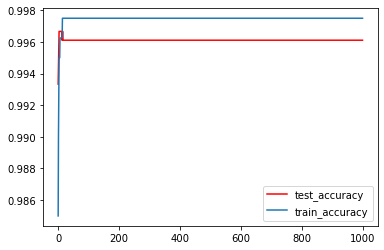

In [145]:
plt.plot(testaccu_list,color='r',label='test_accuracy')
plt.plot(trainaccu_list,label='train_accuracy')
plt.legend()